<a href="https://colab.research.google.com/github/Silosk01/IA_/blob/main/Pr%C3%A1ctica_2_Perceptr%C3%B3n_multicapa_Fuente_de_datos_personal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

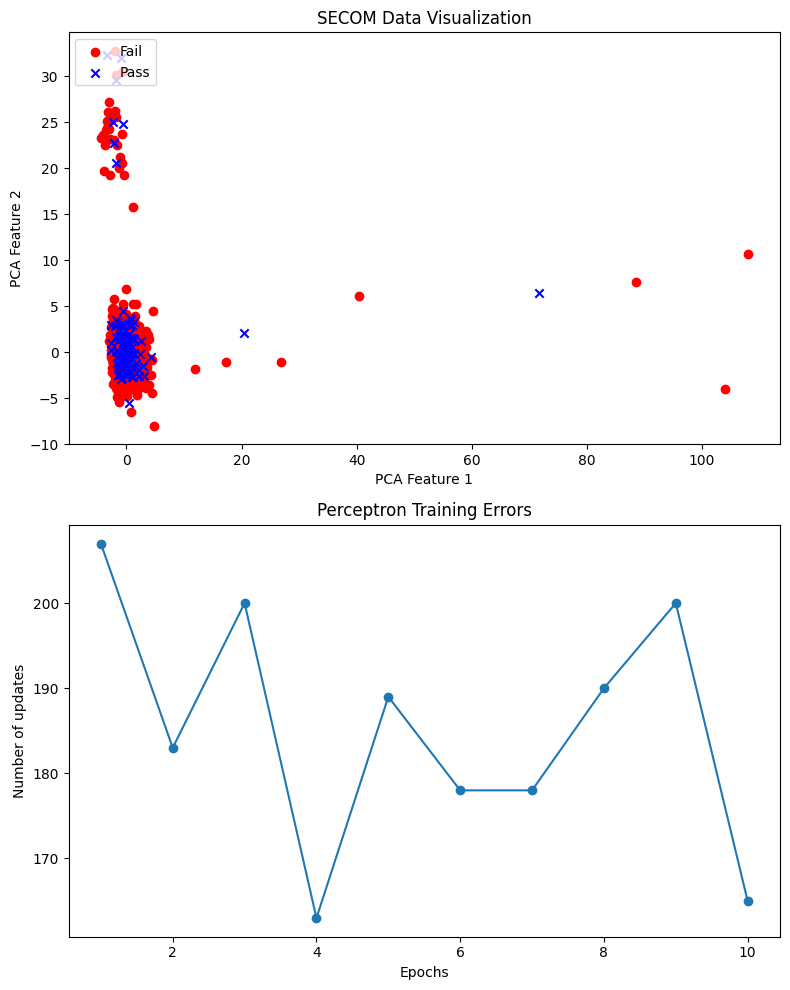

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

def load_secom_data(data_filepath, labels_filepath):
    X = pd.read_csv(data_filepath, header=None, sep=' ')
    y = pd.read_csv(labels_filepath, header=None, sep=' ').iloc[:, 0].values
    y = np.where(y == 1, 1, -1)
    return X.values, y

def preprocess_data(X):
    # Imputar valores NaN
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    # Escalar los datos
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_imputed)

    # Aplicar PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    return X_pca

def plot_data_and_errors(X, y, ppn):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

    # Gráfico de dispersión
    ax1.scatter(X[y == -1, 0], X[y == -1, 1], color='red', marker='o', label='Fail')
    ax1.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='Pass')
    ax1.set_xlabel('PCA Feature 1')
    ax1.set_ylabel('PCA Feature 2')
    ax1.legend(loc='upper left')
    ax1.set_title('SECOM Data Visualization')

    # Gráfico de errores
    ax2.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Number of updates')
    ax2.set_title('Perceptron Training Errors')

    plt.tight_layout()
    plt.show()

# Cargar y preprocesar los datos
data_filepath = 'https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data'
labels_filepath = 'https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data'

X, y = load_secom_data(data_filepath, labels_filepath)
X_pca = preprocess_data(X)

# Entrenar el modelo
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X_pca, y)

# Visualizar los datos y errores
plot_data_and_errors(X_pca, y, ppn)